## Librerias

In [1]:
# Tratamiento de datos
import numpy as np
import pandas as pd
import re

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Estadísticas
import scipy.stats as stats
from scipy.stats import mode
from scipy.stats import f_oneway
from scipy.stats import shapiro
 
# mis cosas
import sys
import os

## Data

In [2]:
data = pd.read_csv('data/train.csv')

In [3]:
df = data.copy()
df

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
0,4995,0.02,26.80,0.09,1.35,0.060,0.09,0.09,1.97,1.48,...,0.031,9.52,0.84,0.001,1.24,0.96,0.09,0.08,0.08,0
1,1709,1.13,3.95,0.32,3.95,0.030,4.66,0.56,1.89,1.36,...,0.170,13.83,1.15,0.006,10.55,3.76,0.02,0.45,0.06,0
2,7825,0.07,8.05,0.04,0.14,0.040,0.06,0.06,0.05,0.00,...,0.120,2.61,1.52,0.008,4.13,0.27,0.03,0.03,0.01,0
3,6918,0.09,26.40,0.03,0.92,0.090,0.57,0.00,0.36,0.03,...,0.055,5.22,1.96,0.000,11.32,0.25,0.09,0.01,0.05,0
4,5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,...,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592,3048,0.01,8.92,0.20,4.88,0.050,0.36,0.09,0.54,0.14,...,0.069,8.60,1.90,0.007,17.18,2.91,0.08,0.43,0.09,0
5593,2130,0.09,1.36,0.04,3.45,0.003,3.42,0.03,1.39,1.12,...,0.108,9.36,1.58,0.009,42.15,4.39,0.02,0.11,0.07,0
5594,5005,0.10,4.95,0.01,0.25,0.040,0.09,0.10,1.88,0.33,...,0.021,18.78,0.62,0.007,5.97,0.32,0.10,0.10,0.08,0
5595,2125,0.05,23.18,0.04,3.65,0.001,4.43,0.63,1.94,1.27,...,0.194,13.32,1.93,0.005,23.84,4.80,0.08,0.22,0.07,0


In [4]:
print(df.shape)
print(df.info())
df.head()

(5597, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5597 entries, 0 to 5596
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      5597 non-null   int64  
 1   col1    5597 non-null   float64
 2   col2    5597 non-null   float64
 3   col3    5597 non-null   float64
 4   col4    5597 non-null   float64
 5   col5    5597 non-null   float64
 6   col6    5597 non-null   float64
 7   col7    5597 non-null   float64
 8   col8    5597 non-null   float64
 9   col9    5597 non-null   float64
 10  col10   5597 non-null   float64
 11  col11   5597 non-null   float64
 12  col12   5597 non-null   float64
 13  col13   5597 non-null   float64
 14  col14   5597 non-null   float64
 15  col15   5597 non-null   float64
 16  col16   5597 non-null   float64
 17  col17   5597 non-null   float64
 18  col18   5597 non-null   float64
 19  col19   5597 non-null   float64
 20  col20   5597 non-null   float64
 21  target  5597 non-null   in

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
0,4995,0.02,26.80,0.09,1.35,0.060,0.09,0.09,1.97,1.48,...,0.031,9.52,0.84,0.001,1.24,0.96,0.09,0.08,0.08,0
1,1709,1.13,3.95,0.32,3.95,0.030,4.66,0.56,1.89,1.36,...,0.170,13.83,1.15,0.006,10.55,3.76,0.02,0.45,0.06,0
2,7825,0.07,8.05,0.04,0.14,0.040,0.06,0.06,0.05,0.00,...,0.120,2.61,1.52,0.008,4.13,0.27,0.03,0.03,0.01,0
3,6918,0.09,26.40,0.03,0.92,0.090,0.57,0.00,0.36,0.03,...,0.055,5.22,1.96,0.000,11.32,0.25,0.09,0.01,0.05,0
4,5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,...,0.135,9.75,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1


- Observo que no hay valores faltantes. 
- Observo que todos son valores numéricos, decimales (float), y que la target es entera, 0s y 1s. Voy a confirmar que no hay otros valores, y que es binario.

In [5]:
valores_unicos = df['target'].unique()
print(valores_unicos)

[0 1]


Confirmado lo anterior, estamos ante un problema de clasificación. 

In [6]:
df.describe()

,ID,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col12,col13,col14,col15,col16,col17,col18,col19,col20,target
count,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,...,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000,5597.000000
mean,3962.909952,0.674797,14.438840,0.163603,1.579702,0.042747,2.213093,0.250890,0.807654,0.766057,...,0.100050,9.819267,1.331880,0.005194,16.621249,2.931896,0.049602,0.149855,0.044999,0.114347
std,2311.129964,1.273677,8.851097,0.254659,1.221220,0.036072,2.581244,0.272472,0.652471,0.436435,...,0.057997,5.581795,0.568734,0.002960,17.729833,2.327347,0.028827,0.144170,0.026929,0.318261
min,0.000000,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1963.000000,0.040000,6.850000,0.030000,0.550000,0.008000,0.100000,0.050000,0.090000,0.400000,...,0.049000,4.940000,1.010000,0.003000,2.220000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,3922.000000,0.070000,14.390000,0.050000,1.210000,0.040000,0.550000,0.090000,0.750000,0.760000,...,0.103000,9.860000,1.420000,0.005000,7.840000,2.430000,0.050000,0.080000,0.050000,0.000000
75%,5960.000000,0.290000,22.260000,0.100000,2.510000,0.070000,4.330000,0.450000,1.390000,1.160000,...,0.151000,14.690000,1.760000,0.008000,29.980000,4.670000,0.070000,0.250000,0.070000,0.000000
max,7993.000000,5.050000,29.840000,1.050000,4.940000,0.130000,8.660000,0.900000,2.000000,1.500000,...,0.200000,19.820000,2.890000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


para verlo mejor, procedo a graficar las variables independientemente.

## Análisis univariado

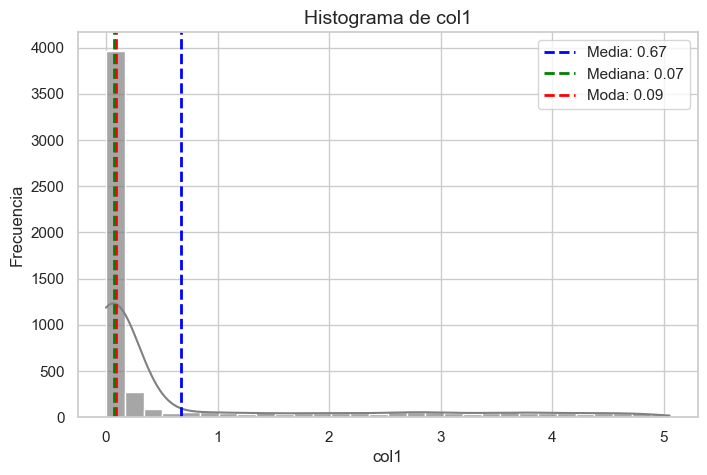

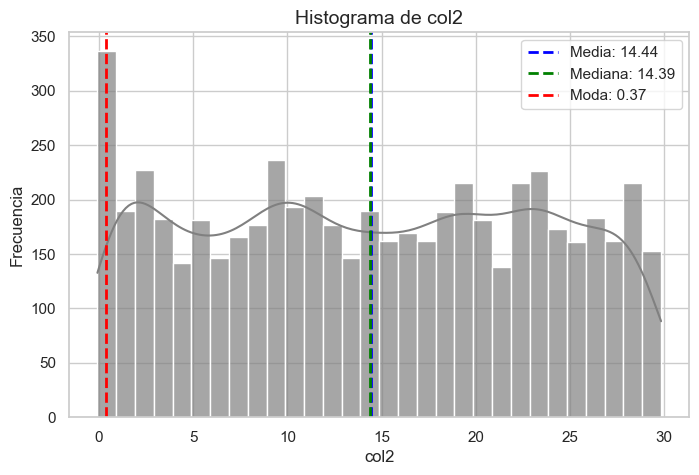

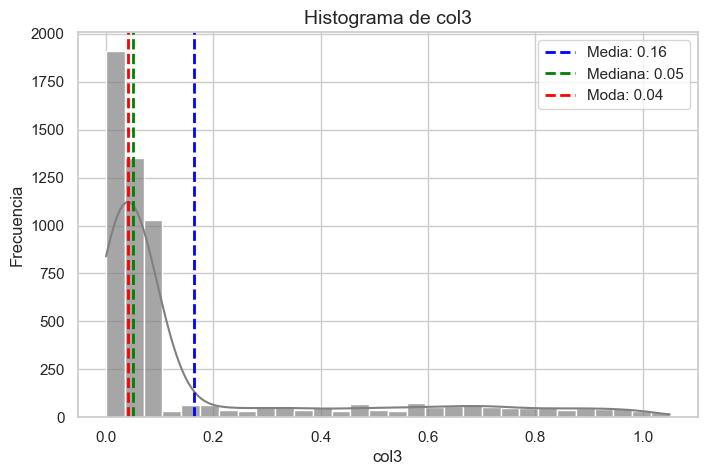

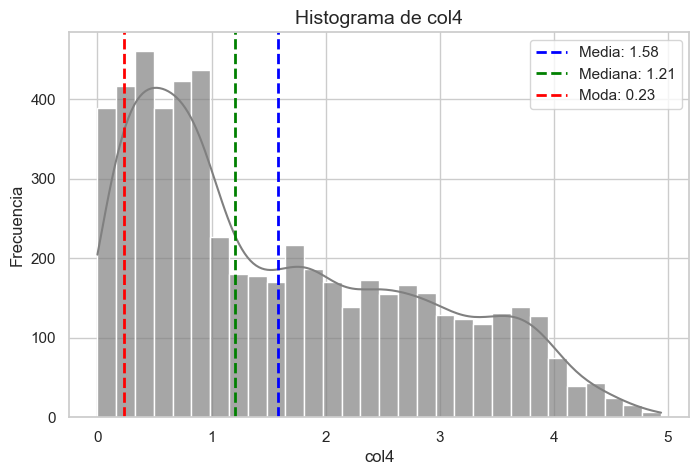

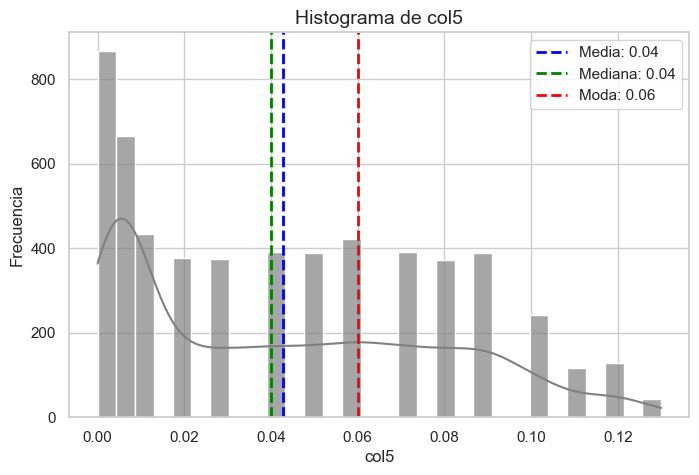

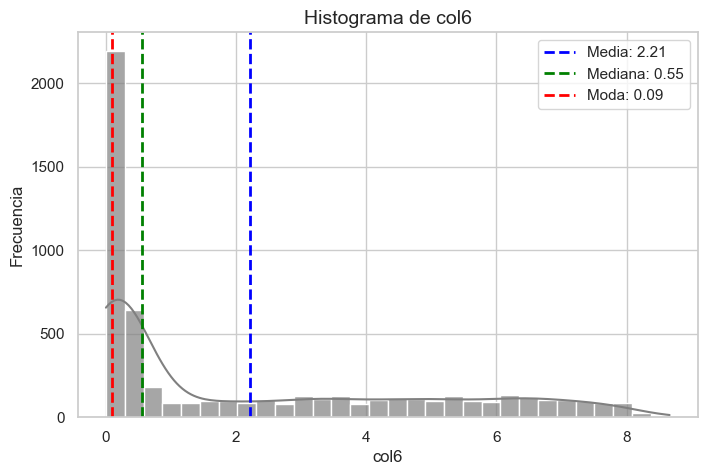

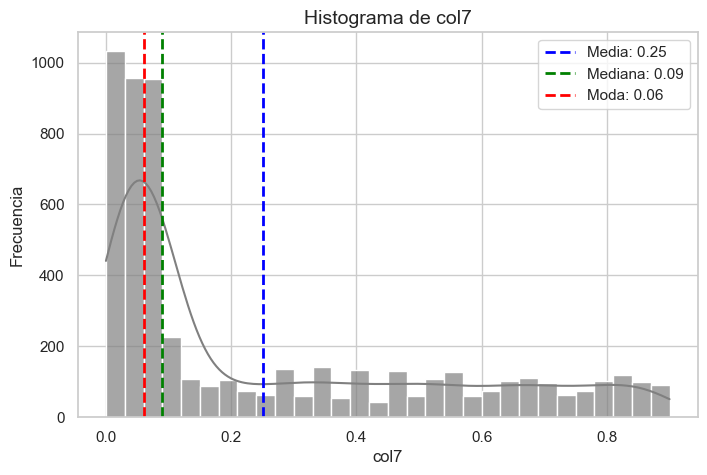

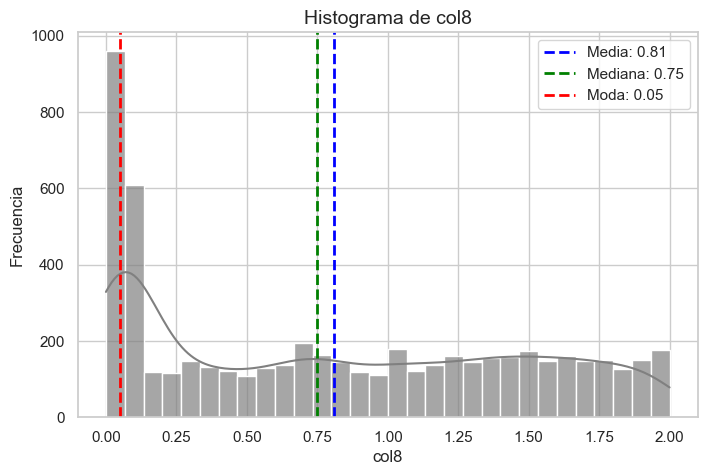

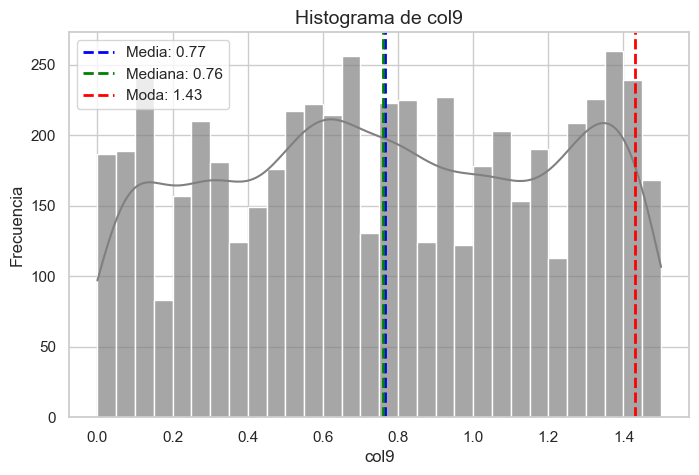

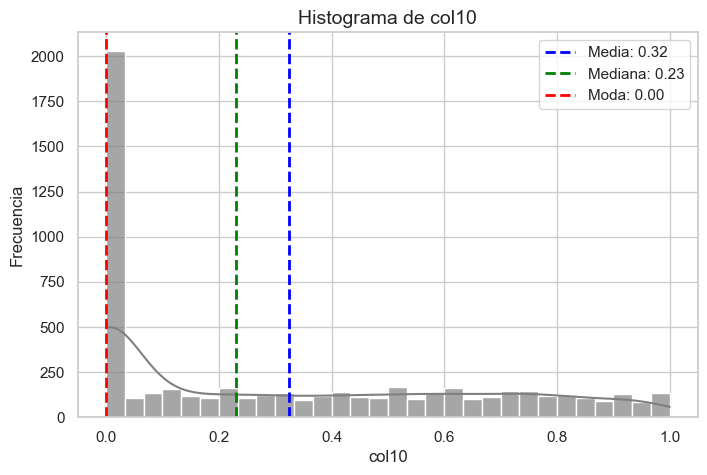

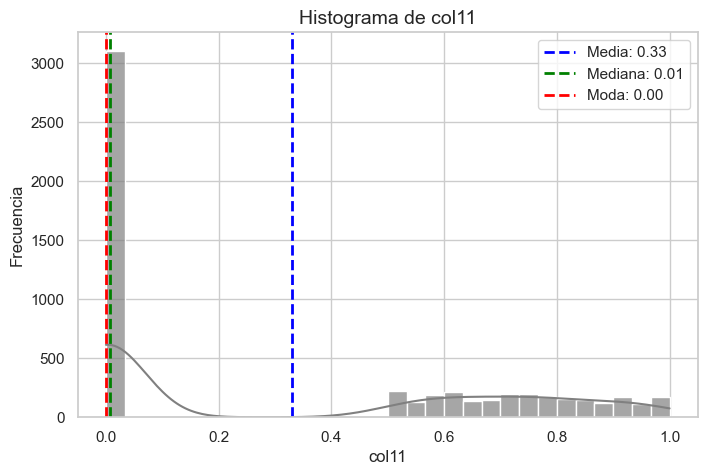

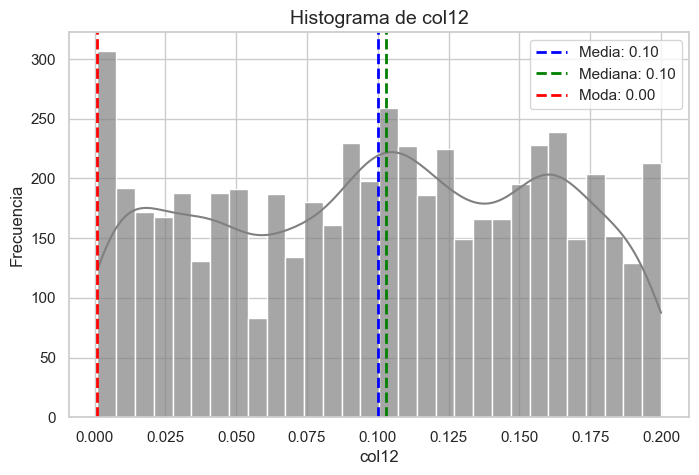

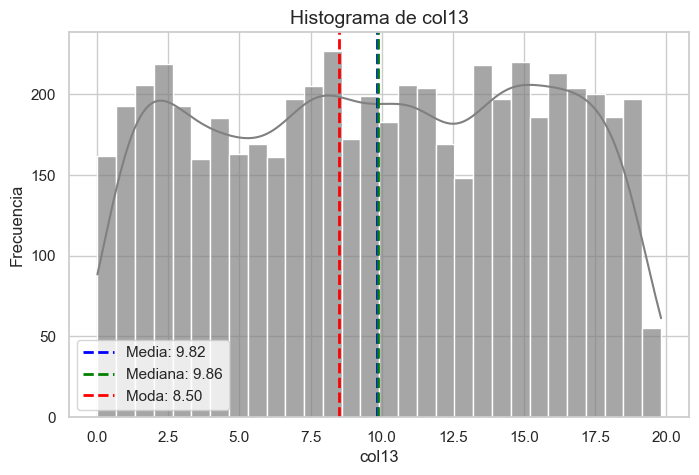

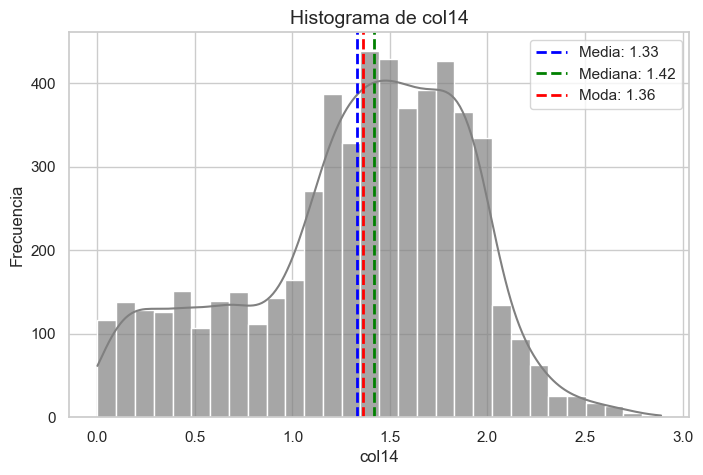

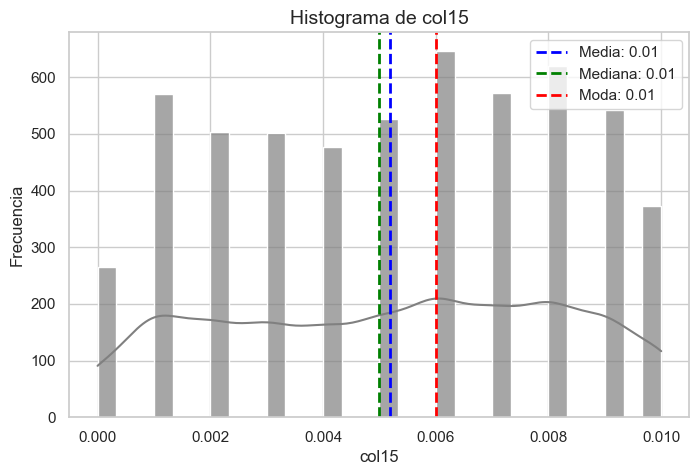

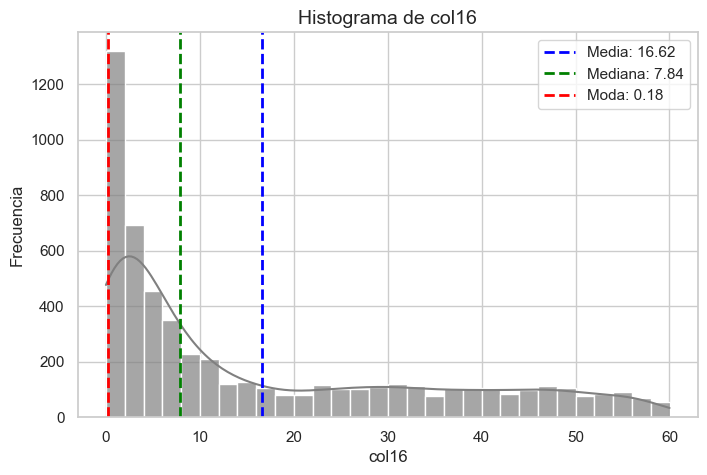

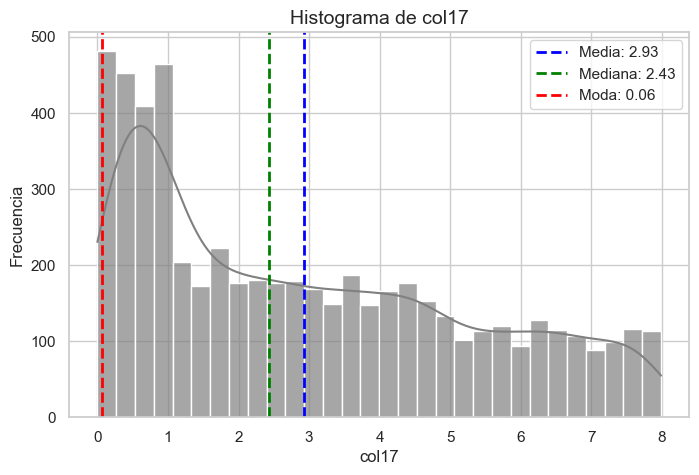

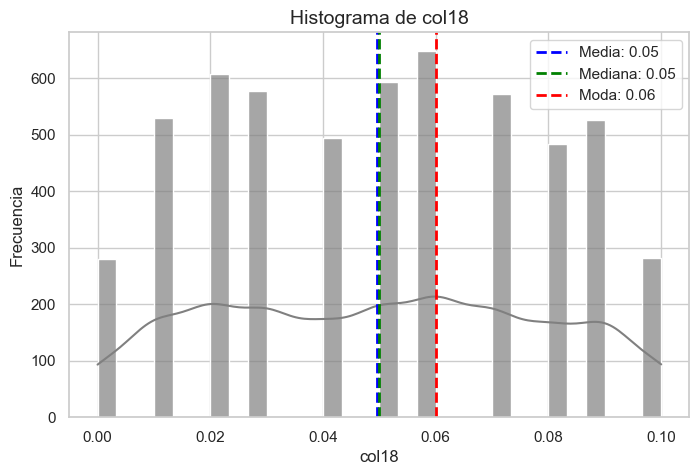

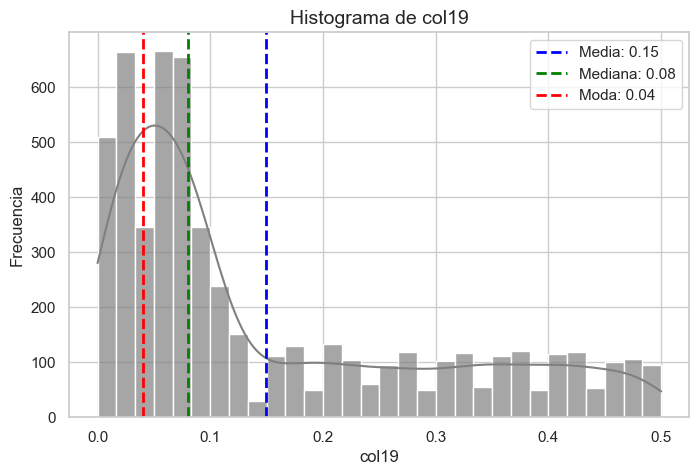

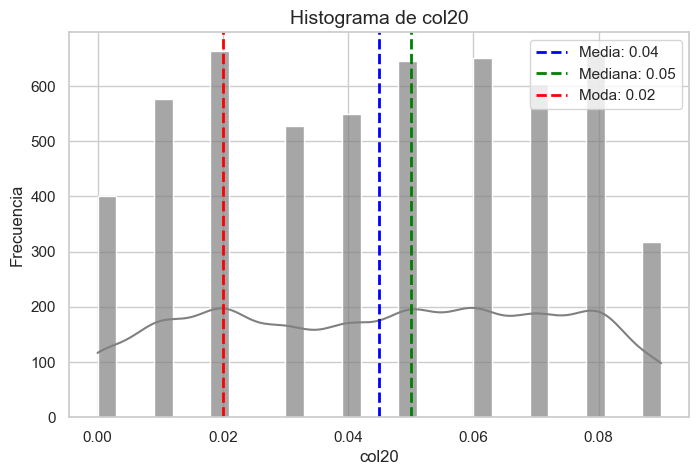

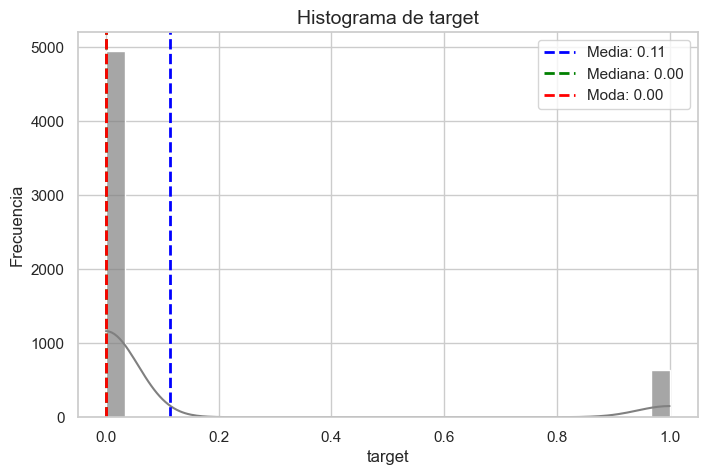

In [7]:
# Configuración de estilo
sns.set(style="whitegrid")

# Filtrar solo las columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols = numeric_cols.drop("ID", errors="ignore")  # Elimina 'ID' si existe


# Crear histogramas
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    
    # Histograma
    sns.histplot(df[col], bins=30, kde=True, color='gray', alpha=0.7)
    
    # Calcular estadísticas
    mean_val = df[col].mean()
    median_val = df[col].median()
    #mode_val = mode(df[col]).mode[0]  # scipy mode() retorna una tupla
    mode_result = mode(df[col].dropna(), keepdims=True)  # Evitar NaN y asegurar array
    mode_val = mode_result.mode[0] if mode_result.count[0] > 0 else np.nan  # Verificar si hay moda válida
    
    
    # Dibujar líneas
    plt.axvline(mean_val, color='blue', linestyle='dashed', linewidth=2, label=f'Media: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {median_val:.2f}')
    plt.axvline(mode_val, color='red', linestyle='dashed', linewidth=2, label=f'Moda: {mode_val:.2f}')
    
    # Etiquetas y título
    plt.title(f'Histograma de {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.legend()
    
    # Mostrar gráfico
    plt.show()

Voy a realizar una matriz de correlación para ver las columnas candidatas a depurar.

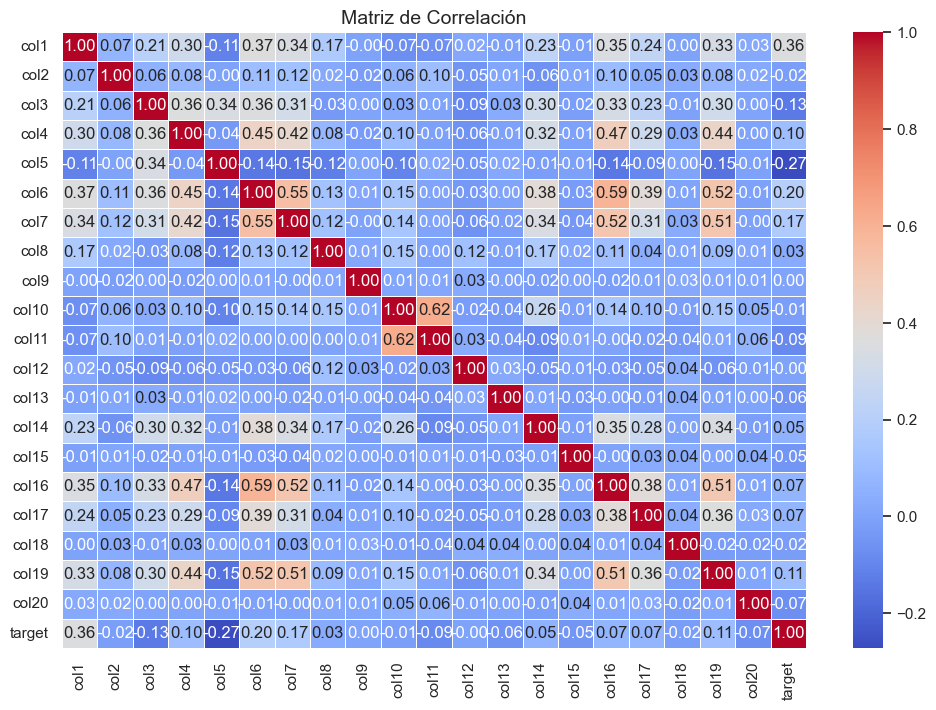

In [10]:
# Calcular la matriz de correlación
corr_matrix = df.drop(columns=['ID'], inplace = True, errors='ignore')  
corr_matrix = df.corr()

# Crear la figura y el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar=True)

# Título
plt.title("Matriz de Correlación", fontsize=14)

# Mostrar gráfico
plt.show()
